# Topic Modelling

### Loading Data

In [1]:
import pandas as pd
import nltk

In [2]:
df = pd.read_csv("../data/news-setopati/news-setopati-processed.csv")
df

,topic,date,title,body
0,politics,"शुक्रबार, कात्तिक २४, २०८०",हर्क साम्पाङको चिठी पाएपछि हवाई नीतिविरूद्ध वि...,सामाजिक सञ्जालमा सक्रिय रहने धरानका मेयर हर्क ...
1,politics,"आइतबार, कात्तिक २६, २०८०",सरकारले भूकम्प प्रभावितलाई राहत पठाउन उपेक्षा ...,उपप्रधानमन्त्री एवं गृहमन्त्री नारायणकाजी श्रे...
2,politics,"आइतबार, कात्तिक २६, २०८०",भूकम्पले भत्किएका संरचना बनाउन त्यहीँका बेरोजग...,सरकारले भूकम्प प्रभावित क्षेत्रको पुनर्निर्माण...
3,politics,"आइतबार, कात्तिक २६, २०८०",भूकम्पपीडितलाई अस्थायी आवास बनाउन प्रतिपरिवार ...,सरकारले कात्तिक गएको भूकम्पबाट पूर्ण रूपमा घर ...
4,politics,"आइतबार, कात्तिक २६, २०८०",हमासले बन्धक बनाएका आफन्तको सुरक्षा माग गर्दै ...,प्यालेस्टाइनको इस्लामिस्ट समूह हमासको बन्धकमा ...
...,...,...,...,...
14979,politics,"बिहीबार, माघ ६, २०७८","काभ्रेमा माघ महिनाभर सभा, भेला गर्न नपाइने",कोभिड सङ्क्रमणको बढ्दो जोखिमलाई दृष्टिगत गरी ज...
14980,politics,"बिहीबार, माघ ६, २०७८",काठमाडौं उपत्यकाका तीनै जिल्ला प्रशासन कार्याल...,उपत्यकाका काठमाडौं भक्तपुर र ललितपुर जिल्ला प्...
14981,politics,"बिहीबार, माघ ६, २०७८",कोरोनाको हटस्पट बनेपछि जागेको नरैनापुर,हाम्रा स्थानीय सरकारसम्पादकीय नोट राजनीतिक अस्...
14982,politics,"बिहीबार, माघ ६, २०७८",सत्तारूढ राजनीतिक समन्वय समितिको बैठक स्थगित,आजका लागि बोलाइएको सत्तारूढ राजनीतिक समन्वय सम...


In [3]:
unprocessed_data = pd.DataFrame(columns=['body'])
unprocessed_data["body"] = df["body"].apply(str)
unprocessed_data

,body
0,सामाजिक सञ्जालमा सक्रिय रहने धरानका मेयर हर्क ...
1,उपप्रधानमन्त्री एवं गृहमन्त्री नारायणकाजी श्रे...
2,सरकारले भूकम्प प्रभावित क्षेत्रको पुनर्निर्माण...
3,सरकारले कात्तिक गएको भूकम्पबाट पूर्ण रूपमा घर ...
4,प्यालेस्टाइनको इस्लामिस्ट समूह हमासको बन्धकमा ...
...,...
14979,कोभिड सङ्क्रमणको बढ्दो जोखिमलाई दृष्टिगत गरी ज...
14980,उपत्यकाका काठमाडौं भक्तपुर र ललितपुर जिल्ला प्...
14981,हाम्रा स्थानीय सरकारसम्पादकीय नोट राजनीतिक अस्...
14982,आजका लागि बोलाइएको सत्तारूढ राजनीतिक समन्वय सम...


### Preprocessing

In [4]:
nepali_stopwords = open("../resources/stopwords.txt", "r")
stopwords = nepali_stopwords.read().split()
# print(stopwords)
print(len(stopwords))

501


In [5]:
'''
Remove unwanted characters
Remove stop words 
'''
import re
def string_manipulation(unprocessed_data)  : 
    unprocessed_data['body'] = unprocessed_data['body'].apply(lambda x: re.sub('[।(),०-९<<?!,—,–,/,’,‘,:,\u200d]', '', x))
    unprocessed_data['body'] = unprocessed_data['body'].apply(lambda x: " ".join([i.replace('\n', '').replace('\t', '').replace("\"",'') for i in x.split() if i not in (stopwords) and i != ' ']))
    return unprocessed_data

processed_data = string_manipulation(unprocessed_data)
processed_data

# processed_data = pd.DataFrame(columns=['body'])
# processed_data["body"] = df["body"]
# processed_data

,body
0,सामाजिक सञ्जालमा सक्रिय रहने धरानका मेयर हर्क ...
1,उपप्रधानमन्त्री एवं गृहमन्त्री नारायणकाजी श्रे...
2,सरकारले भूकम्प प्रभावित क्षेत्रको पुनर्निर्माण...
3,सरकारले कात्तिक भूकम्पबाट पूर्ण रूपमा भत्किएका...
4,प्यालेस्टाइनको इस्लामिस्ट समूह हमासको बन्धकमा ...
...,...
14979,कोभिड सङ्क्रमणको बढ्दो जोखिमलाई दृष्टिगत जिल्ल...
14980,उपत्यकाका काठमाडौं भक्तपुर ललितपुर जिल्ला प्रश...
14981,स्थानीय सरकारसम्पादकीय नोट राजनीतिक अस्थिरताका...
14982,आजका बोलाइएको सत्तारूढ राजनीतिक समन्वय समितिको...


In [6]:
from nepalitokenizer import NepaliTokenizer

In [7]:
'''
tokenizing the corpus 
'''
tokenize = NepaliTokenizer()
processed_data["body"] = processed_data["body"].apply(tokenize.tokenizer)
processed_data

,body
0,"[सामाजिक, सञ्जालमा, सक्रिय, रहने, धरानका, मेयर..."
1,"[उपप्रधानमन्त्री, एवं, गृहमन्त्री, नारायणकाजी,..."
2,"[सरकारले, भूकम्प, प्रभावित, क्षेत्रको, पुनर्नि..."
3,"[सरकारले, कात्तिक, भूकम्पबाट, पूर्ण, रूपमा, भत..."
4,"[प्यालेस्टाइनको, इस्लामिस्ट, समूह, हमासको, बन्..."
...,...
14979,"[कोभिड, सङ्क्रमणको, बढ्दो, जोखिमलाई, दृष्टिगत,..."
14980,"[उपत्यकाका, काठमाडौं, भक्तपुर, ललितपुर, जिल्ला..."
14981,"[स्थानीय, सरकारसम्पादकीय, नोट, राजनीतिक, अस्थि..."
14982,"[आजका, बोलाइएको, सत्तारूढ, राजनीतिक, समन्वय, स..."


In [8]:
import snowballstemmer

In [9]:
'''
Stemming & StopWord removal after Stemming
'''
stemmer = snowballstemmer.NepaliStemmer()

def get_stem(words):
    global stemmer
    new_list = stemmer.stemWords(words)
    return new_list

def clean_data(words):
    new_list = []
    for word in words:
        if len(word)>2 and word not in stopwords:
            new_list.append(word)

    return new_list
        
# ans = get_stem(["फिल्मी", "अनुराग", "वर्ष", "अघिसम्म", "उनका", "बलिउड"])
# ans

In [10]:
processed_data['body'] = processed_data['body'].apply(lambda x : get_stem(x))

In [11]:
processed_data['body'] = processed_data['body'].apply(lambda x : clean_data(x))

In [12]:
processed_data_list = processed_data['body']

### Visualization and Analysis of Data

In [77]:
'''
Finding the frequency Distribution of Words
'''
# words_list = []
# for sentence in processed_data_list:
#     words_list.extend(sentence)
# freq_dist = nltk.FreqDist(words_list)
# freq_dist.most_common(20)

'\nFinding the frequency Distribution of Words\n'

In [78]:
'''
Visualization of Most Frequency 
'''
# %config InlineBackend.figure_format = 'retina'
# import matplotlib.pyplot as plt
# from matplotlib.font_manager import FontProperties
# import seaborn as sns
# sns.set()
# nepali_font = FontProperties(fname = 'Mangal.ttf')
# temp = pd.DataFrame(freq_dist.most_common(30),  columns=['word', 'count'])
# fig, ax = plt.subplots(figsize=(10, 6))
# sns.barplot(x='word', y='count', 
#             data=temp, ax=ax)
# plt.title("Top words")
# plt.xticks(rotation='vertical',fontproperties=nepali_font);

'\nVisualization of Most Frequency \n'

In [79]:
'''
Forming Word Cloud
'''
# %config InlineBackend.figure_format = 'retina'

# from wordcloud import WordCloud
# import wordcloud
# # creation of wordcloud
# wcloud_fig = WordCloud(colormap='viridis', width=300, height=200, font_path="./Mangal.ttf").generate_from_frequencies(freq_dist)

# # plotting the wordcloud
# plt.figure(figsize=(10,7), frameon=True )

# plt.imshow(wcloud_fig, interpolation  = 'bilinear')
# plt.show()

'\nForming Word Cloud\n'

### Preparation for LDA

In [13]:
from gensim import corpora

In [14]:
from gensim.test.utils import datapath

In [15]:
'''
Representing the Corpus in dictionary: 
{unique_id : word}
'''
id2word = corpora.Dictionary(processed_data_list)
# print(id2word)

In [ ]:
'''
Checking dictionary created
'''
# count = 0
# for k, v in id2word.iteritems():
#     print(k, v)
#     count += 1
#     if count > 10:
#         break

In [16]:
'''
Remove very rare and very common words:

- words appearing less than 15 times
- words appearing in more than 10% of all documents
'''
# id2word.filter_extremes(no_below=15, no_above=0.1, keep_n=100000)
id2word.filter_extremes(no_below=15, no_above=0.1, keep_n=None)

In [17]:
'''
bag-of-words format = list of (token_id, token_count) 2-tuples
'''
#  now lets create a encoded bag of words 
bow_corpus = [id2word.doc2bow(sent) for sent in processed_data_list]
# bow_corpus[0] 

In [85]:
'''
Preview BOW for our sample preprocessed document
'''
# Here document_num is document number 4310 which we have checked in Step 2
# document_num = 4310
# bow_doc_4310 = bow_corpus[document_num]
# count = 0

# for i in range(len(bow_doc_4310)):
#     print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
#                                                      id2word[bow_doc_4310[i][0]], 
#                                                      bow_doc_4310[i][1]))
#     count += 1
#     if count > 10:
#         break

'\nPreview BOW for our sample preprocessed document\n'

### LDA - (BOW)

In [18]:
# Creating the object for LDA model using gensim library
import gensim
from gensim.models import CoherenceModel

In [46]:
'''
Loading the Saved Model
'''
# loading model from disk
from gensim import  models

temp_file = datapath("./lda_model_politics_30")
lda_model = models.ldamodel.LdaModel.load(temp_file)

In [89]:
'''
Train your lda model using gensim.models.LdaMulticore and save it to 'lda_model'
'''
# LDA = gensim.models.ldamulticore.LdaMulticore
# lda_model = LDA(corpus=corpus_matrix,id2word=id2word, num_topics=10, random_state=100,update_every=1,chunksize=100,passes=5,alpha='auto',per_word_topics=True)

# lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=30, id2word=id2word, passes=50, workers=5)

In [90]:
'''
For Saving  Model
'''
#saving model to disk.
# temp_file = datapath("./lda_model_politics_30")
# lda_model.save(temp_file)

In [24]:
'''
For each topic, we will explore the words occuring in that topic and its relative weight
'''
for idx, topic in lda_model.print_topics(-1):
    print("Topic id : {}".format(idx))
    print("Words: {} \n".format(topic))
    print("\n")

Topic id : 0
Words: 0.067*"एमसिसी" + 0.037*"सम्झौता" + 0.023*"पारित" + 0.018*"अमेरि" + 0.014*"परियोजना" + 0.014*"पास" + 0.010*"रावल" + 0.010*"अनुमोदन" + 0.010*"व्याख्यात्मक" + 0.010*"एमसीसी" 



Topic id : 1
Words: 0.046*"कमिटी" + 0.025*"विभाग" + 0.023*"अभियान" + 0.016*"साझा" + 0.016*"पाण्डे" + 0.013*"महाधिवेशन" + 0.013*"प्रतिवेदन" + 0.012*"संगठन" + 0.012*"पदाधिकारी" + 0.012*"मिश्र" 



Topic id : 2
Words: 0.028*"सिफारिस" + 0.027*"नम्बर" + 0.018*"मेयर" + 0.017*"चौधरी" + 0.017*"भट्टराई" + 0.016*"वडा" + 0.014*"खनाल" + 0.013*"चितवन" + 0.010*"साल" + 0.010*"उम्मेदवारी" 



Topic id : 3
Words: 0.039*"विद्यार्" + 0.038*"शिक्षा" + 0.036*"विद्यालय" + 0.020*"शिक्षक" + 0.019*"विश्वविद्यालय" + 0.017*"क्याम्पस" + 0.013*"कलेज" + 0.011*"संगठन" + 0.010*"नेविसंघ" + 0.010*"स्वास्थ्य" 



Topic id : 4
Words: 0.072*"मुख्यमन्त्री" + 0.042*"बजेट" + 0.019*"कोशी" + 0.015*"नियुक्त" + 0.014*"समर्थन" + 0.014*"शपथ" + 0.012*"प्रदेशसभा" + 0.012*"कार्की" + 0.010*"राई" + 0.009*"बहुमत" 



Topic id : 5
Words: 0.031*"ए

In [26]:
'''
This groups the documents by their topic, for e.g
{
    0 : [list of documents in topic index 0]
}
'''

cluster_by_topic = {}
[cluster_by_topic.setdefault(i, []) for i in range(lda_model.num_topics)]
index = 0
for bow in bow_corpus:
    topics_list = lda_model.get_document_topics(bow,minimum_probability=0.8)
    for topic_id, score in topics_list: 
        cluster_by_topic[topic_id].append(index)
    index += 1

In [27]:
'''
# Printing the documents that belong to a certain topic 
# '''
for k,v in cluster_by_topic.items():
    print ("Topic : {}".format(lda_model.print_topic(k)))
    print ("---------------------------------------------------")
    for index in v:
        print (df['title'][index])
    print ("---------------------------------------------------")


Topic : 0.067*"एमसिसी" + 0.037*"सम्झौता" + 0.023*"पारित" + 0.018*"अमेरि" + 0.014*"परियोजना" + 0.014*"पास" + 0.010*"रावल" + 0.010*"अनुमोदन" + 0.010*"व्याख्यात्मक" + 0.010*"एमसीसी"
---------------------------------------------------
एमसिसीबारे माओवादी केन्द्रका केन्द्रीय सदस्य के भन्छन्?
एमसिसीको प्रतिक्रिया- संसदीय अनुमोदनपछि कार्यान्वयनको बाटो खुल्यो
व्याख्यात्मक घोषणासहित एमसिसी पारित भएपछि निकै खुसी छु: प्रचण्ड
संसदबाट अनुमोदन भयो एमसिसी
यस्ता छन् मन्त्रिपरिषद्ले संसदमा पेस गर्न लागेको एमसिसीबारे व्याख्यात्मक घोषणाका १२ बुँदा
दुई खालको राजनीति नगरौं- मिनेन्द्र रिजाल
एमसिसी पाउनु हाम्रो हक, सम्मानजनक हुनुपर्छ: झलनाथ खनाल
एमसिसीको व्याख्यात्मक टिप्पणीमा यस्ता छन् ११ बुँदा
पढ्नुहोस् एमसिसीबारे सेतोपाटीमा प्रकाशित ११ स्टोरी
चितवन पुगेर कांग्रेस प्रवक्ताले भने- प्रचण्डले एमसिसी पास गर्छाैं भने सिग्नेचर गरेका हैनन् र?
एमसिसीको सन्देश: २० दिनमा संसदबाट पारित नभए फिर्ता
एमसिसी सम्झौताको ‍पूर्णपाठ (नेपालीमा)
एमसिसीलाई लेखिएको पत्रबारे प्रचण्डको सचिवालयले दियो प्रष्टीकरण
एमसिसीमा देउवा र प्रचण

In [28]:
'''
Getting the top 5 documents in each topics
'''
my_ids = [i for i in range(len(bow_corpus))]

top_documents = {}
[top_documents.setdefault(i, []) for i in range(lda_model.num_topics)]

for topic_id in range(lda_model.num_topics):
    tops = sorted(zip(my_ids, lda_model[bow_corpus]), reverse=True, key=lambda x: abs(dict(x[1]).get(topic_id, 0.0)))
    top_five =  tops[ : 5]
    for index, _ in top_five:
        top_documents[topic_id].append(index)

In [29]:
'''
Printing the top 5 documents in each topics
'''
for k,v in top_documents.items():
    print ("Topic : {}".format(lda_model.print_topic(k)))
    print ("---------------------------------------------------")
    for index in v:
        print (df['title'][index])
    print ("---------------------------------------------------")

Topic : 0.067*"एमसिसी" + 0.037*"सम्झौता" + 0.023*"पारित" + 0.018*"अमेरि" + 0.014*"परियोजना" + 0.014*"पास" + 0.010*"रावल" + 0.010*"अनुमोदन" + 0.010*"व्याख्यात्मक" + 0.010*"एमसीसी"
---------------------------------------------------
संसदबाट अनुमोदन भयो एमसिसी
देउवा र प्रचण्डलाई एमसिसीको जवाफ: फेब्रुअरी २८ सम्म निर्णय गर्नुभएन भने अर्को कदमबारे छलफल हुन्छ
एमसिसीको प्रतिक्रिया- संसदीय अनुमोदनपछि कार्यान्वयनको बाटो खुल्यो
एमसिसी सम्झौताको ‍पूर्णपाठ (नेपालीमा)
एमसिसी पाउनु हाम्रो हक, सम्मानजनक हुनुपर्छ: झलनाथ खनाल
---------------------------------------------------
Topic : 0.046*"कमिटी" + 0.025*"विभाग" + 0.023*"अभियान" + 0.016*"साझा" + 0.016*"पाण्डे" + 0.013*"महाधिवेशन" + 0.013*"प्रतिवेदन" + 0.012*"संगठन" + 0.012*"पदाधिकारी" + 0.012*"मिश्र"
---------------------------------------------------
एकीकृत समाजवादीको सचिवालय बैठक बस्दै
माओवादीले पनि केन्द्रीय कमिटी बैठक लाइभ गर्ने
एमाले पोलिटब्युरो बैठक बस्दै
एमाले सचिवालय बैठक आज
च्यासलमा एमाले सचिवालय बैठक सुरू
------------------------------------

In [96]:
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
18     0.057663  0.145096       1        1  10.529971
9     -0.160292  0.035161       2        1   5.090591
27     0.165741  0.180969       3        1   4.823370
17     0.233131  0.075788       4        1   4.607147
7      0.041817 -0.035091       5        1   4.416103
16    -0.054217 -0.222139       6        1   4.077644
25     0.126239  0.030588       7        1   4.045089
2     -0.253252  0.038353       8        1   3.821107
24    -0.154750  0.169106       9        1   3.721713
4     -0.100371  0.008919      10        1   3.679659
13     0.143717 -0.089691      11        1   3.474364
20    -0.157898  0.074441      12        1   3.474147
8      0.101957  0.097891      13        1   3.415566
11     0.044346 -0.095635      14        1   3.298754
29     0.008846 -0.167726      15        1   3.209091
19     0.048508 -0.136978      16        1   3.156414
10     0.085527  0.121766      17        1   2.934317
26     0.049517 -0.091618      18        1   2.851842
12    -0.245444  0.015417      19        1   2.750387
22    -0.075124 -0.173679      20        1   2.672424
1     -0.106941  0.058621      21        1   2.641679
3      0.089650 -0.018786      22        1   2.470262
28    -0.020538 -0.104225      23        1   2.464850
5     -0.013419  0.164051      24        1   1.984889
0      0.130895  0.007282      25        1   1.946800
15    -0.102707  0.044280      26        1   1.827833
14     0.058642 -0.046652      27        1   1.727953
6      0.033596 -0.062980      28        1   1.713871
21    -0.028868 -0.018284      29        1   1.611905
23     0.054029 -0.004245      30        1   1.560258, topic_info=              Term         Freq        Total Category  logprob  loglift
1559        प्रहरी  4727.000000  4727.000000  Default  30.0000  30.0000
1292      नागरिकता  3843.000000  3843.000000  Default  29.0000  29.0000
365          अदालत  4699.000000  4699.000000  Default  28.0000  28.0000
431         विधेयक  4525.000000  4525.000000  Default  27.0000  27.0000
522   मुख्यमन्त्री  4209.000000  4209.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
1313          सेना   129.231452  1138.842699  Topic30  -5.2125   1.9842
1888         निवास   124.370952  1290.349722  Topic30  -5.2508   1.8209
1061          सिंह   122.052336  1326.241008  Topic30  -5.2697   1.7747
155            भवन   118.398557  1816.685157  Topic30  -5.3000   1.4296
761          घोषणा   107.024826  2744.733607  Topic30  -5.4010   0.9159

[2009 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
9346     18  0.972839   अंगिकृत
2923     18  0.995516   अंगीकृत
1903      4  0.020111      अखिल
1903     20  0.024134      अखिल
1903     21  0.132734      अखिल
...     ...       ...       ...
7103     24  0.040203  होपार्टी
7103     26  0.080406  होपार्टी
6375     15  0.072721  होप्रहरी
6375     23  0.872653  होप्रहरी
5497     12  0.946615  होसभापति

[10223 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[19, 10, 28, 18, 8, 17, 26, 3, 25, 5, 14, 21, 9, 12, 30, 20, 11, 27, 13, 23, 2, 4, 29, 6, 1, 16, 15, 7, 22, 24])

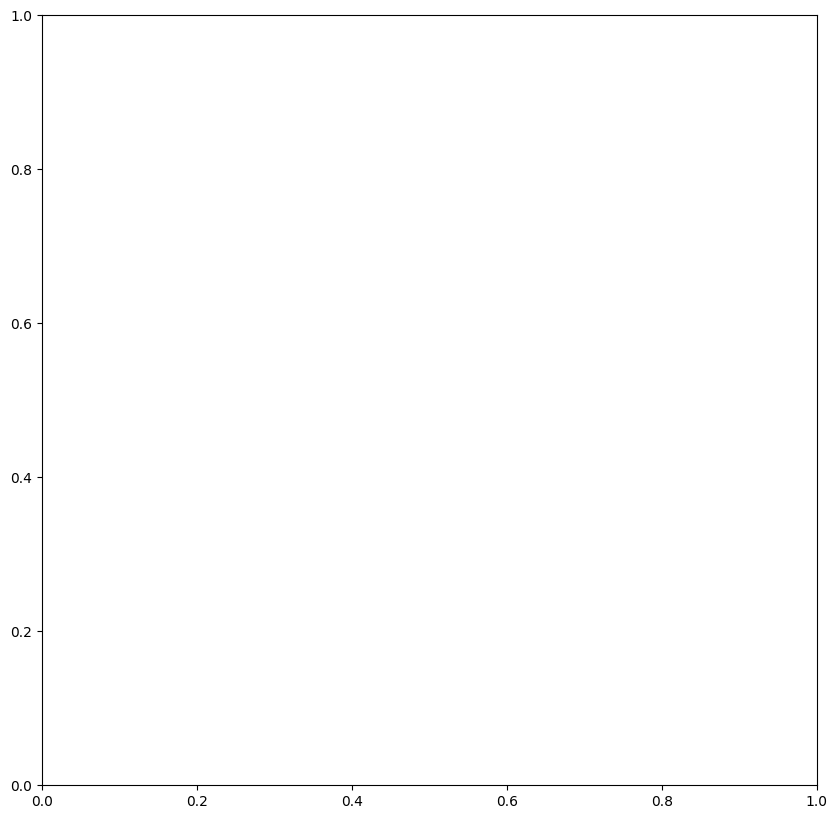

In [97]:
fig, ax = plt.subplots(figsize=(10, 10))
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus = bow_corpus, dictionary = id2word)
vis

### LDA - (TF-IDF)

In [ ]:
'''
Create tf-idf model object using models.TfidfModel on 'bow_corpus' and save it to 'tfidf'
'''
# from gensim import corpora, models

# tfidf = models.TfidfModel(bow_corpus)

In [ ]:
'''
Apply transformation to the entire corpus and call it 'corpus_tfidf'
'''
# corpus_tfidf = tfidf[bow_corpus]

In [ ]:
'''
Preview TF-IDF scores for our first document --> --> (token_id, tfidf score)
'''
# count = 0
# from pprint import pprint
# for doc in corpus_tfidf:
#     pprint(doc)
#     count +=1
#     if count > 10 :
#         break

In [ ]:
# import operator

In [ ]:
'''
This took more than 20 minutes so i had to stop
It attempts to keep training lda model until the thresold is reached
'''
def ret_top_model():
    """
    Since LDAmodel is a probabilistic model, it comes up different topics each time we run it. To control the
    quality of the topic model we produce, we can see what the interpretability of the best topic is and keep
    evaluating the topic model until this threshold is crossed. 
    
    Returns:
    -------
    lm: Final evaluated topic model
    top_topics: ranked topics in decreasing order. List of tuples
    """
    # top_topics = [(0, 0)]
    # while top_topics[0][1] < 0.97:

    #     lm = gensim.models.LdaMulticore(bow_corpus, num_topics=20, id2word=id2word, passes=2, workers=2)
    #     coherence_values = {}
    #     for n, topic in lm.show_topics(num_topics=-1, formatted=False):
    #         topic = [word for word, _ in topic]
    #         cm = CoherenceModel(topics=[topic], texts=processed_data_list, dictionary=id2word, window_size=10)
    #         coherence_values[n] = cm.get_coherence()
    #     top_topics = sorted(coherence_values.items(), key=operator.itemgetter(1), reverse=True)
    #     print(top_topics[0][1])
    # return lm, top_topics

In [ ]:
# lm, top_topics = ret_top_model()

### HDP

In [ ]:
# from gensim.models import HdpModel

In [ ]:
# hdp_model = gensim.models.HdpModel(bow_corpus, id2word=id2word)

In [ ]:
'''
For each topic, we will explore the words occuring in that topic and its relative weight
'''
# for idx, topic in hdp_model.print_topics(-1):
#     print("Topic: {} \nWords: {}".format(topic, idx ))
#     print("\n")

In [ ]:
# document_dict = {
#     0 : "Manoranjan",
#     1000 : "Sahitya",
#     2000 : "Suchana Prabhidhi",
#     3000 : "Bichar",
#     4350 : "Swasthya",
#     5000 : "Prabas",
#     6000 : "Khelkud",
#     7000 : "Viswa",
#     8000 : "Desh",
#     9000 : "Artha",
# }
# document_num = 9200 
# print()
# # Our test document is document number 4310
# for k,v in document_dict.items():
#     print("\n{}\n".format(v))
#     for index, score in sorted(hdp_model[bow_corpus[k]], key=lambda tup: -1*tup[1]):
#         print("\nScore: {}\t \nTopic: {}".format(score, hdp_model.print_topic(index, 5)))

In [ ]:
# '''
# Define lda model using corpus_tfidf, again using gensim.models.LdaMulticore()
# '''

# lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, 
#                                        num_topics=25, 
#                                        id2word = id2word, 
#                                        passes = 2, 
#                                        workers=2)

In [ ]:
# '''
# For each topic, we will explore the words occuring in that topic and its relative weight
# '''
# for idx, topic in lda_model_tfidf.print_topics(-1):
#     print("Topic: {} Word: {}".format(idx, topic))
#     print("\n")

In [ ]:
# '''
# Check which topic our test document belongs to using the LDA TF-IDF model.
# '''
# # Our test document is document number 4310
# for index, score in sorted(lda_model_tfidf[bow_corpus[document_num]], key=lambda tup: -1*tup[1]):
#     print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))

In [ ]:
# lda_model.print_topics()

### Unseen Document Topic Identification 

In [84]:
df1 = pd.DataFrame(columns=['body'])
df1

,body


In [85]:
'''
Unseen Document
'''

# Rajniti
df1.loc[0] = ['''
सन् २०२० को डिसेम्बर २९ मा हमासका सबै समूहका नेता इस्माइल हानियाले गाजाका विभिन्न सशस्त्र गुटहरूबीच "बलियो सन्देश र एकताको सङ्केत" को रूपमा 'स्ट्रङ पिलर' छद्म नाम दिइएको चारमध्ये पहिलो सैन्य अभ्यास गर्ने घोषणा गरे।

हमास गाजाको सबैभन्दा शक्तिशाली सशस्त्र समूह थियो। अन्य १० प्यालेस्टिनी समूह पनि सम्मिलित गठबन्धन हमास प्रमुख घटक थियो। ती लडाकु समूहहरू युद्धको खेलजस्तो अभ्यासमा सहभागी भए। त्यसलाई "संयुक्त अपरेशन कक्ष"ले निगरानी गरेको थियो।

गाजाका सशस्त्र गुटहरूसँग एउटा केन्द्रीय कमान्डअन्तर्गत समन्वय गर्न सन् २०१८ मा उक्त संरचना बनाइएको थियो।

सन् २०१८ अघि हमासले प्यालेस्टिनी इस्लामिक जिहाद (पीआईजे) सँग समन्वय गरेको थियो। पीआईजे गाजाको दोस्रो ठूलो सशस्त्र गुट हो। ब्रिटेन र अन्य देशमा उक्त सङ्गठनलाई हमासलाई जसरी नै प्रतिबन्धित आतङ्कवादी सङ्गठनका रूपमा हेरिन्छ। 

पहिलाका द्वन्द्वमा पनि हमासले अरू समूहहरूसँग मिलेर लडाइँ गरेको थियो।

तर २०२० को अभ्यासलाई धेरै समूह एकजुट भएको प्रमाणको रूपमा प्रचारबाजी गरियो।

हमास नेताले पहिलो अभ्यासले सशस्त्र समूहहरूको "स्थायी तत्परता" प्रतिबिम्बित गरेको बताएका थिए।

तीन वर्षमा गरिएका चारवटा संयुक्त अभ्यासमध्ये सन् २०२० को अभ्यास पहिलो थियो। विभिन्न सामाजिक सञ्जालहरूमा ती सबैसँग सम्बन्धित भिडिओहरू छन्।

सन्देश आदानप्रदान गर्ने एप टेलिग्राममा प्रेषित फुटेजका अनुसार ‘स्ट्रङ पिलर’ अभ्यासमा सहभागी भएका पीआईजेसहित १० वटा लडाकु समूहलाई टाउकोमा बाँध्ने पट्टी र चिह्नका आधारमा बीबीसीले स्पष्टसँग पहिचान गरेको छ।  
''' ]

df1

,body
0,\nसन् २०२० को डिसेम्बर २९ मा हमासका सबै समूहका...


In [86]:
'''
Preparing the Bag of Words
'''
df1['body'] = df1['body'].apply(str)
processed_new_data = string_manipulation(df1)
df1

,body
0,डिसेम्बर हमासका समूहका नेता इस्माइल हानियाले ग...


In [87]:
processed_new_data["body"] = processed_new_data["body"].apply(tokenize.tokenizer)

In [88]:
processed_new_data['body'] = processed_new_data['body'].apply(lambda x : get_stem(x))
# processed_new_data.news.to_list()

In [89]:
processed_new_data['body'] = processed_new_data['body'].apply(lambda x : clean_data(x))
for l in processed_new_data.body.to_list():
    print(len(l))

117


In [90]:
'''
Finds the topic and corresponding score for the unseen document 
'''
# Data preprocessing step for the unseen document
list_of_string = processed_new_data.body.to_list()[0] 
bow_vector = id2word.doc2bow(list_of_string)


for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.614849865436554	 Topic: 0.029*"युक्रेन" + 0.018*"रूस" + 0.018*"आक्रमण" + 0.017*"रूसी" + 0.017*"अमेरि"
Score: 0.11322100460529327	 Topic: 0.109*"प्रहरी" + 0.013*"सुरक्षा" + 0.011*"सशस्त्र" + 0.010*"बढुवा" + 0.010*"आन्दोलन"
Score: 0.08975256234407425	 Topic: 0.014*"अवसर" + 0.012*"सामाजिक" + 0.012*"दिवस" + 0.012*"व्यक्त" + 0.009*"एवं"
Score: 0.08513977378606796	 Topic: 0.031*"एकता" + 0.025*"पुन" + 0.024*"कम्युनिष्ट" + 0.024*"मोर्चा" + 0.012*"महासचिव"
Score: 0.06206146627664566	 Topic: 0.046*"कमिटी" + 0.025*"विभाग" + 0.023*"अभियान" + 0.016*"साझा" + 0.016*"पाण्डे"
Score: 0.024158278480172157	 Topic: 0.050*"शर्मा" + 0.044*"फोहोर" + 0.036*"बजेट" + 0.031*"अर्थमन्त्री" + 0.018*"छानबिन"


### Document Similarity - JensenShanon Distance

In [91]:
import numpy as np

In [92]:
'''
Obtaining the topic distribution of every document
'''
doc_topic_dist = []
for bow in bow_corpus:
    topics_list = lda_model.get_document_topics(bow,minimum_probability=0)
    # print(topics_list)
    row = []
    for idx, score in topics_list:
        row.append(score)

    doc_topic_dist.append(row)

print(len(doc_topic_dist))

14984


In [93]:
doc_distribution = np.array(doc_topic_dist)
doc_distribution.shape

(14984, 30)

In [94]:
new_dist = []
for idx,score in lda_model.get_document_topics(bow_vector, minimum_probability=0):
    new_dist.append(score)

new_doc_distribution = np.array(new_dist)
new_doc_distribution.shape
# new_doc_distribution = np.array([tup[1] for tup in lda_model[bow_vector]])
# new_doc_distribution.shape

(30,)

In [95]:
from scipy.stats import entropy
from scipy.spatial import distance

In [96]:
# def jensen_shannon(query, matrix):
#     """
#     This function implements a Jensen-Shannon similarity
#     between the input query (an LDA topic distribution for a document)
#     and the entire corpus of topic distributions.
#     It returns an array of length M where M is the number of documents in the corpus
#     """
#     # lets keep with the p,q notation above
#     p = query[None,:].T # take transpose
#     q = matrix.T # transpose matrix
#     m = 0.5*(p + q)
#     return np.sqrt(0.5*(entropy(p,m) + entropy(q,m)))

def jensen_shannon(query, matrix):
    """
    This function implements a Jensen-Shannon similarity
    between the input query (an LDA topic distribution for a document)
    and the entire corpus of topic distributions.
    """
    sim = [distance.jensenshannon(data,query) for data in matrix]
    return np.array(sim)

In [97]:
def get_most_similar_documents(query,matrix,k=10):
    """
    This function implements the Jensen-Shannon distance above
    and retruns the top k indices of the smallest jensen shannon distances
    """
    sims = jensen_shannon(query,matrix) # list of jensen shannon distances
    return sims.argsort()[:k] # the top k positional index of the smallest Jensen Shannon distances

In [98]:
most_sim_ids = get_most_similar_documents(new_doc_distribution, doc_distribution)
# print(most_sim_ids)
for ids in most_sim_ids:
    print(df['title'][ids])

इजिप्टमा गोली हानेर दुई इजरायली पर्यटकको हत्या
रहिनन् ट्रम्पकी पहिलो पत्नी इभाना
विश्वका प्रमुख ७ देशका नेताहरूले युक्रेनका राष्ट्रपतिसँग छलफल गर्ने
युक्रेनले क्रिमियाको सैन्य कार्यालयमै आक्रमण गरेर त्यहाँका प्रमुखसहित ३५ जना मारेको दाबी
चीनले सक्यो ताइवानलक्षित सैन्य अभ्यास
युक्रेनसँग युद्ध नगर्न भन्दै रूसमा प्रदर्शन, सयौं पक्राउ
अफ्रिकी मुलुक नाइजरमा सैन्य कू, राष्ट्रपति नियन्त्रणमा
भारतीय र चिनियाँ सैनिकबीच फेरि भयो झडप, कैयौं घाइते
पाकिस्तानमा विस्फोटबाट मृत्यु हुने १ सय पुगे
किम जोङ उनले हटाए उच्च सैन्य अधिकारी
